# MLB Valuations Hierarchical Clustering

In [93]:
import numpy as np 
from numpy import mean, absolute
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc

In [4]:
#set precision to display in dataframes
pd.set_option('precision',4)

#Read sample file
#Enter path to location of the file here
dir = "/Volumes/Elements/khartless/Grad School/MBA 6490/" 
filename = "2_MLB_Valuations_KH.xlsx"

df = pd.read_excel(dir+filename, sheet_name="MLB Valuation ")

In [74]:
cols = list(df.columns)[-4:]
#normalize data prior to clustering
X = preprocessing.normalize(df[cols], norm='l1', axis=0)

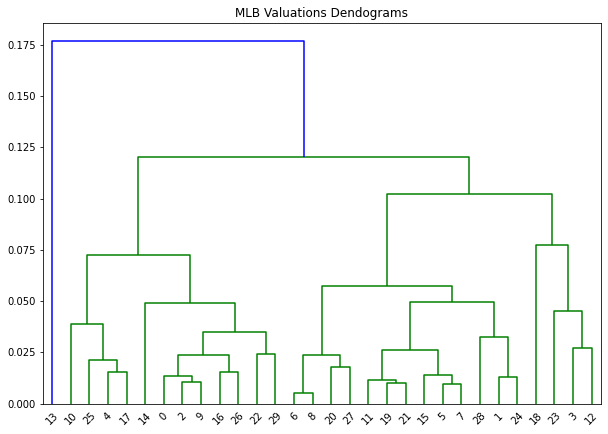

In [128]:
#Full model Dendogram
plt.figure(figsize=(10, 7))
plt.title("MLB Valuations Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='complete'),p=10)

In [147]:
#Create clusters with 4 nodes
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
#Add cluster to the original dataframe
df['Cluster'] = cluster.fit_predict(X)

#Create clusters with 10 nodes
subCluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')
#Add sub clusters to the original dataframe
df['Sub Cluster'] = subCluster.fit_predict(X)

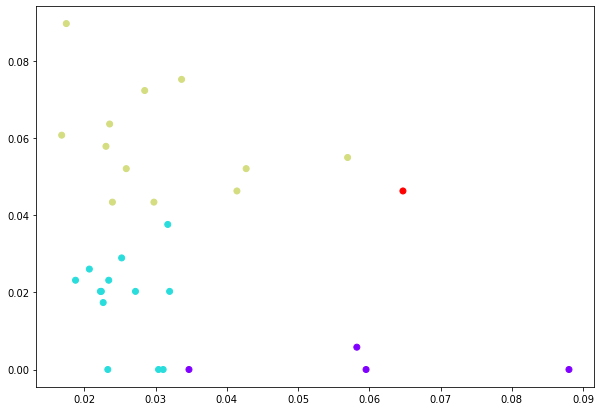

In [102]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

In [151]:
df[['Team','Cluster','Sub Cluster']].sort_values(by=['Cluster', 'Sub Cluster'])

,Team,Cluster,Sub Cluster
23,San Francisco Giants,0,4
3,Boston Red Sox,0,5
12,Los Angeles Angels of Anaheim,0,5
18,New York Yankees,0,9
1,Atlanta Braves,1,1
24,Seattle Mariners,1,1
28,Toronto Blue Jays,1,1
5,Chicago White Sox,1,3
7,Cleveland Indians,1,3
11,Kansas City Royals,1,3
